In [1]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [2]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight)

In [4]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [5]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3) # 최근접 이웃의 갯수 기본값이 5가 아닌 3으로 변경 - 모델의 복잡도가 높아짐

knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [6]:
knr.predict([[50], [100]])

array([1033.33333333, 1033.33333333])

In [11]:
distances, indexes = knr.kneighbors([[50]])

# 넘파이 평균 mean
np.mean(train_target[indexes])

1033.3333333333333

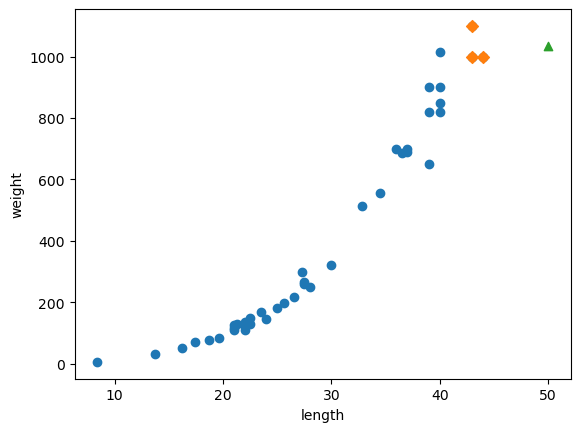

In [13]:
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D') # 50cm 길이의 농어 최근접 이웃
plt.scatter(50,1033,marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [32]:
# 선형 회귀

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 훈련
lr.fit(train_input, train_target)

# 예측 - 50cm 농어 무게
lr.predict([[50]])

array([1175.46660679])

In [33]:
# 최적의 기울기 - 계수, 가중치 - Lr.coef_
# 최적의 절편 - Lr.intercept_

print(lr.coef_, lr.intercept_) # y = 36.08770486x - 628.918630224583 : x는 길이, y는 무게

[36.08770486] -628.9186360224583


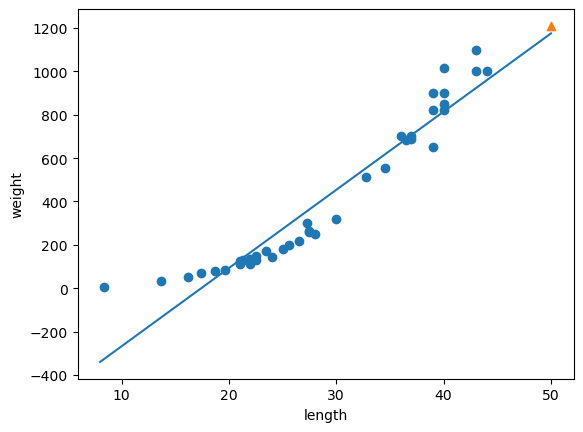

In [34]:
# matplotlib - plot : 직선, 곡선 그래프

plt.scatter(train_input, train_target) # 훈련 세트
plt.plot([8, 50], [8 * lr.coef_[0] + lr.intercept_, 50 * lr.coef_[0] + lr.intercept_])
plt.scatter(50, 1210, marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [36]:
print(lr.score(train_input, train_target)) # 훈련 세트 결정 계수
print(lr.score(test_input, test_target)) # 테스트 세트 결정 계수

0.9197642358001907
0.9119302228805146


In [37]:
# 다항 회귀 - 2차원 방정식 : ax² + bx + c / a,b : 최적의 가중치(기울기, 계수), c : 절편, x - 길이, y - 무게

train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [38]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [39]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [48]:
lr.predict([[30 ** 2, 30]])

array([369.76099017])

In [41]:
print(lr.coef_, lr.intercept_)

[  1.03872824 -23.76316965] 147.80066482152694


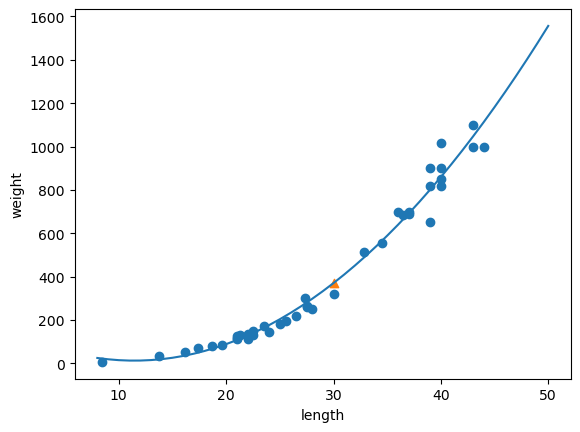

In [49]:
# 곡선 - 연속된 x, y 좌표를 제공
point = np.arange(8, 51) # 범위가 8~ 50 길이

plt.scatter(train_input, train_target) # 훈련 세트 산포도
plt.scatter(30, 369, marker='^') # 테스트 세트 산포도
plt.plot(point, lr.coef_[0] * point ** 2 + lr.coef_[1] * point + lr.intercept_)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [45]:
print(lr.score(train_poly, train_target)) # 훈련 세트 결정계수
print(lr.score(test_poly, test_target)) # 테스트 세트 결정계수

0.9805363480463511
0.9476657510213575
